In [31]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# 종목명과 종목 코드의 딕셔너리
stock_dict = {
    '포스코': '005490',
    '삼성전자': '005930',
    '현대차': '005380',
    '셀트리온': '068270',
    '삼성생명': '032830'
}

# 2020년 4월 1일부터 2023년 5월 17일까지의 주가 데이터 크롤링
start_date = '2017-12-01'
end_date = '2023-05-17'

# 종목별 주가 데이터 크롤링
dfs = []
for name, code in stock_dict.items():
    df = fdr.DataReader(code, start_date, end_date)
    df['Code'] = code
    df['Name'] = name  # 종목명 컬럼 추가
    dfs.append(df)

# 종목별 주가 데이터 병합
df_merged = pd.concat(dfs)

df_merged.reset_index(level='Date', inplace=True)

# 결과 출력
print(df_merged)

           Date    Open    High     Low   Close  Volume    Change    Code  \
0    2017-12-01  332000  334000  327000  328500  265832 -0.019403  005490   
1    2017-12-04  329500  338000  328000  337500  272250  0.027397  005490   
2    2017-12-05  338500  346000  338000  345000  311882  0.022222  005490   
3    2017-12-06  344000  344000  333000  333000  253371 -0.034783  005490   
4    2017-12-07  332000  336500  326000  332500  234419 -0.001502  005490   
...         ...     ...     ...     ...     ...     ...       ...     ...   
6715 2023-05-11   67400   68000   66900   67700  211834  0.004451  032830   
6716 2023-05-12   67100   67800   66400   66800  180516 -0.013294  032830   
6717 2023-05-15   67400   67400   66400   67200  144643  0.005988  032830   
6718 2023-05-16   67400   67700   66500   67000  164576 -0.002976  032830   
6719 2023-05-17   66400   67100   66400   66900  115474 -0.001493  032830   

      Name  
0      포스코  
1      포스코  
2      포스코  
3      포스코  
4      포스코

### MA_5(5일 이동평균선) : 5일동안 움직인 주가를 평균내서 그린 선

In [33]:
df_merged['MA_5'] = df_merged.groupby('Name')['Close'].rolling(window=5).mean().reset_index(0, drop=True)
df_merged.head(10)

,Date,Open,High,Low,Close,Volume,Change,Code,Name,MA_5
0,2017-12-01,332000,334000,327000,328500,265832,-0.019403,005490,포스코,NaN
1,2017-12-04,329500,338000,328000,337500,272250,0.027397,005490,포스코,NaN
2,2017-12-05,338500,346000,338000,345000,311882,0.022222,005490,포스코,NaN
3,2017-12-06,344000,344000,333000,333000,253371,-0.034783,005490,포스코,NaN
4,2017-12-07,332000,336500,326000,332500,234419,-0.001502,005490,포스코,335300.0
5,2017-12-08,330000,332500,325500,330500,193234,-0.006015,005490,포스코,335700.0
6,2017-12-11,330000,334000,328000,332500,190866,0.006051,005490,포스코,334700.0
7,2017-12-12,333000,334500,328000,332000,211538,-0.001504,005490,포스코,332100.0
8,2017-12-13,328500,337000,328500,334500,162803,0.007530,005490,포스코,332400.0
9,2017-12-14,337000,341000,330500,330500,384127,-0.011958,005490,포스코,332000.0


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

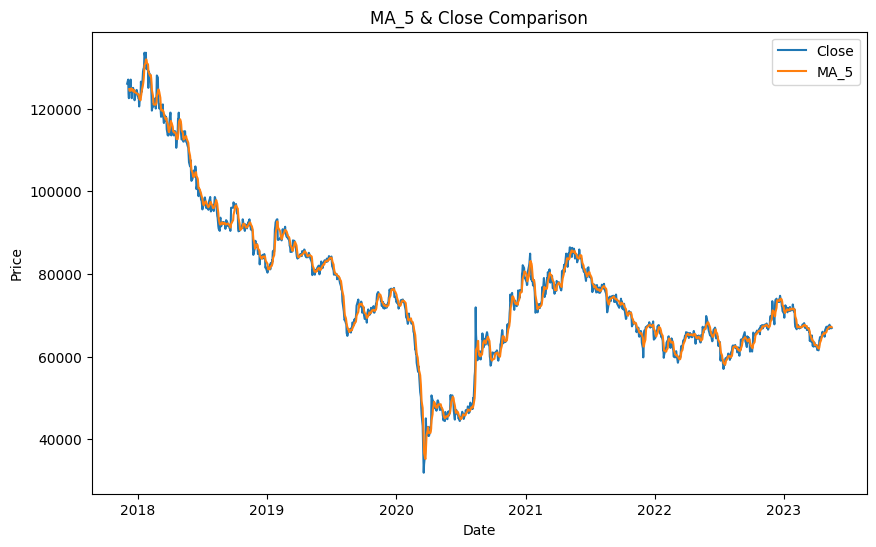

In [34]:
import matplotlib.pyplot as plt

posco_df = df_merged[df_merged['Name'] == '삼성생명']

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(posco_df['Date'], posco_df['Close'], label='Close')
plt.plot(posco_df['Date'], posco_df['MA_5'], label='MA_5')

# 그래프 축과 제목 설정
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MA_5 & Close Comparison')

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()

# 스토캐스틱 오실레이터 (Stochastic Oscillator):
주가의 현재 상대적인 위치를 측정하여 매수 및 매도 신호를 판단하는데 사용되는 지표입니다.  
스토캐스틱 오실레이터는 주가의 고점과 저점 사이의 상대적인 강도를 측정하여 주가의 흐름을 분석합니다.

### Fast %K :
Fast %K는 가장 빠르게 변하는 지표로, 주가의 현재 위치를 나타냅니다.  
Fast %K는 주식 종가와 일정 기간 동안의 최저가와 최고가를 이용하여 계산됩니다.  
Fast %K 값은 0부터 100까지의 범위를 가지며, 80 이상은 주가가 상대적으로 과매수 상태를 나타내고, 20 이하는 주가가 상대적으로 과매도 상태를 나타냅니다.  

### Slow %K : 
Slow %K는 Fast %K의 이동평균으로, 주가의 상대적인 강도를 더 부드럽게 보여줍니다.  
Slow %K 값은 Fast %K 값의 이동평균을 계산하여 얻어집니다.  
Slow %K 값은 주가의 상대적인 강도를 나타내는 지표로, 주가의 흐름을 파악하는 데 도움을 줍니다.  

### Slow %D :
Slow %D는 Slow %K의 이동평균으로, 주가의 상대적인 강도를 더욱 부드럽게 보여줍니다.  
Slow %D 값은 Slow %K 값의 이동평균을 계산하여 얻어집니다.  
Slow %D 값은 Slow %K 값의 변동을 더욱 완화한 지표로, 주가의 흐름을 더 정확하게 파악하는 데 도움을 줍니다.  

In [35]:
# Fast %K 계산 함수 정의
def get_stochastic_fast_k(close_price, low, high, n=5):
    fast_k = ((close_price - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
    return fast_k

# Slow %K 계산 함수 정의
def get_stochastic_slow_k(fast_k, n=5):
    slow_k = fast_k.rolling(n).mean()
    return slow_k

# Slow %D 계산 함수 정의
def get_stochastic_slow_d(slow_k, n=5):
    slow_d = slow_k.rolling(n).mean()
    return slow_d

# fast_k, slow_k, slow_d를 계산하여 데이터프레임에 추가
df_merged['fast_%K'] = get_stochastic_fast_k(df_merged['Close'], df_merged['Low'], df_merged['High'], 5)
df_merged['slow_%K'] = get_stochastic_slow_k(df_merged['fast_%K'], 5)
df_merged['slow_%D'] = get_stochastic_slow_d(df_merged['slow_%K'], 5)

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

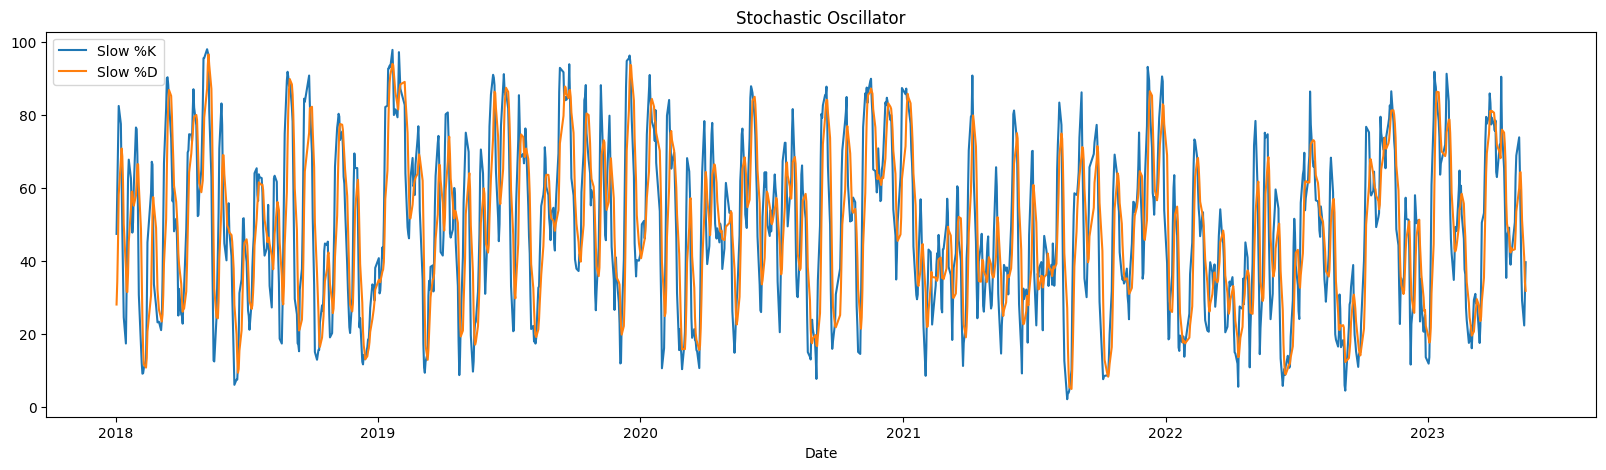

In [44]:
# 삼성전자 데이터 선택
samsung_df = df_merged[df_merged['Name'] == '삼성전자']

# 그래프 그리기
plt.figure(figsize=(20, 5))
plt.plot(samsung_df['Date'], samsung_df['slow_%K'], label='Slow %K')
plt.plot(samsung_df['Date'], samsung_df['slow_%D'], label='Slow %D')
plt.xlabel('Date')
plt.title('Stochastic Oscillator')
plt.legend()
plt.show()

### RSI(상대강도지수) : RSI는 주식의 가격 움직임을 측정하여 과매수와 과매도 상태를 파악하는 데 도움을 주는 기술적 분석 지표

RSI는 주식 가격의 상승과 하락을 비교하여 추세의 강도를 측정하는데 사용  
주식 가격이 상승할수록 RSI 값은 0에서 100 사이의 범위에서 증가, 주식 가격이 하락할수록 RSI 값은 감소  

RSI 값이 70 이상이면 과매수 상태로 간주  
RSI 값이 30 이하인 경우에는 과매도 상태로 간주  

In [37]:
def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    up = delta.where(delta > 0, 0)
    down = -delta.where(delta < 0, 0)
    average_gain = up.rolling(window).mean()
    average_loss = down.rolling(window).mean()
    relative_strength = average_gain / average_loss
    rsi = 100 - (100 / (1 + relative_strength))
    df['RSI'] = rsi
    return df

df_with_rsi = calculate_rsi(df_merged)

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

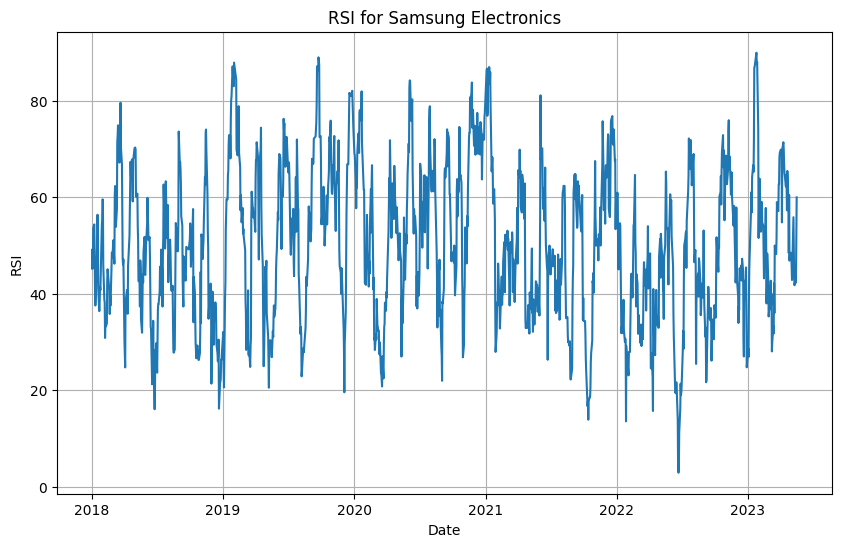

In [43]:
# Select Samsung Electronics (삼성전자) data
samsung_df = df_merged[df_merged['Name'] == '삼성전자']

# Plot RSI for Samsung Electronics
plt.figure(figsize=(10, 6))
plt.plot(samsung_df['Date'], samsung_df['RSI'])
plt.title('RSI for Samsung Electronics')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.grid(True)
plt.show()

### 볼린저 밴드(Bollinger Bands) : 주가의 변동성을 측정하고 추세의 강도와 방향을 파악하는 데 사용되는 기술적 분석 도구  
상단 밴드(Upper Band): 중간 밴드 위에 상대적으로 고정된 표준 편차를 더하여 계산.(여기선 5일로 계산)  
일반적으로 20일 이동 평균선에서 2개의 표준 편차를 더한 값입니다.  
상단 밴드는 주가의 상승 경향에서 상한선 역할

하단 밴드(Lower Band): 중간 밴드 아래에 상대적으로 고정된 표준 편차를 빼서 계산됩니다.  
일반적으로 20일 이동 평균선에서 2개의 표준 편차를 뺀 값입니다.  
하단 밴드는 주가의 하락 경향에서 하한선 역할

In [39]:
# 볼린저 밴드 함수 정의
def calculate_bollinger_bands(df, window=20, std=2):
    # 표준편차 계산
    df['STD'] = df['Close'].rolling(window=window).std()
    # 상단 볼린저 밴드 계산
    df['Upper'] = df['MA_5'] + (std * df['STD'])
    # 하단 볼린저 밴드 계산
    df['Lower'] = df['MA_5'] - (std * df['STD'])
    return df

# 볼린저 밴드 계산
df_with_bollinger_bands = calculate_bollinger_bands(df_merged)

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

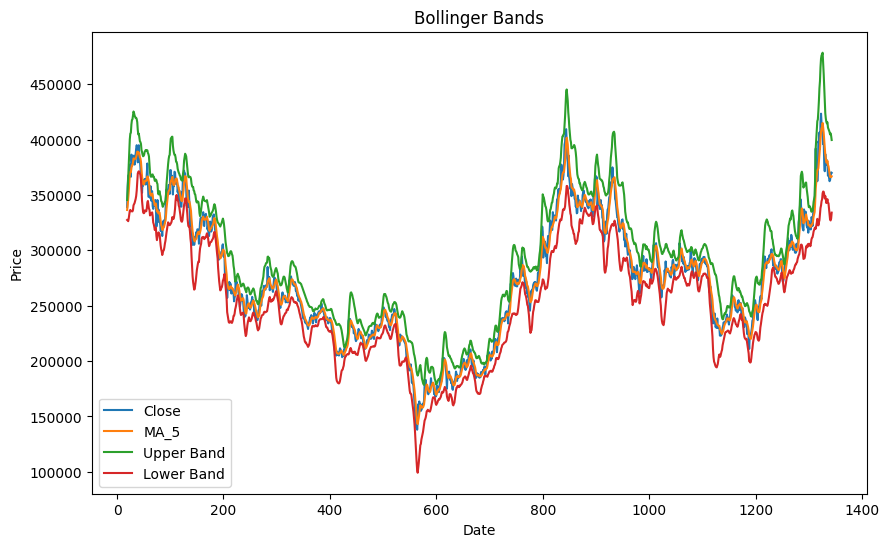

In [42]:
import matplotlib.pyplot as plt

def plot_bollinger_bands(data):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(data.index, data['Close'], label='Close')
    ax.plot(data.index, data['MA_5'], label='MA_5')
    ax.plot(data.index, data['Upper'], label='Upper Band')
    ax.plot(data.index, data['Lower'], label='Lower Band')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title('Bollinger Bands')
    ax.legend()
    
    plt.show()

# 삼성전자의 볼린저 밴드 그래프 그리기
samsung_df = df_merged[df_merged['Name'] == '포스코']
plot_bollinger_bands(samsung_df)

In [41]:
df_merged = df_merged[df_merged['Date'] >= '2018-01-01']
df_merged

,Date,Open,High,Low,Close,Volume,Change,Code,Name,MA_5,fast_%K,slow_%K,slow_%D,RSI,STD,Upper,Lower
19,2018-01-02,335000,341000,332500,339000,153013,0.019549,005490,포스코,336500.0,83.333333,68.177419,66.786022,59.139785,4508.471558,345516.943116,327483.056884
20,2018-01-03,347000,358500,346500,357500,485812,0.054572,005490,포스코,340600.0,96.610169,71.499453,69.985912,69.841270,6796.864602,354193.729204,327006.270796
21,2018-01-04,362000,370000,361000,367500,416948,0.027972,005490,포스코,346200.0,93.902439,72.215425,70.716094,74.482759,9914.768357,366029.536715,326370.463285
22,2018-01-05,369000,369500,365500,368000,205202,0.001361,005490,포스코,352900.0,95.121951,79.626912,71.805992,73.758865,12030.225093,376960.450186,328839.549814
23,2018-01-08,370000,374000,363500,369500,206165,0.004076,005490,포스코,360300.0,89.156627,91.624904,76.628823,78.676471,13874.887387,388049.774774,332550.225226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6715,2023-05-11,67400,68000,66900,67700,211834,0.004451,032830,삼성생명,67200.0,85.714286,82.128902,84.318494,67.123288,1180.142721,69560.285442,64839.714558
6716,2023-05-12,67100,67800,66400,66800,180516,-0.013294,032830,삼성생명,67200.0,42.857143,73.858225,83.017728,56.578947,1100.848955,69401.697909,64998.302091
6717,2023-05-15,67400,67400,66400,67200,144643,0.005988,032830,삼성생명,67160.0,50.000000,64.464286,77.805540,57.692308,1033.186181,69226.372361,65093.627639
6718,2023-05-16,67400,67700,66500,67000,164576,-0.002976,032830,삼성생명,67220.0,37.500000,61.964286,73.269822,59.210526,987.967078,69195.934156,65244.065844


In [47]:
df_merged.to_csv('stock_data(5y).csv', index=False)

In [45]:
df_merged.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
Change     0
Code       0
Name       0
MA_5       0
fast_%K    0
slow_%K    0
slow_%D    0
RSI        0
STD        0
Upper      0
Lower      0
dtype: int64